# Machine Learning

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Victor Uc Cetina <[victoruccetina@gmail.com](mailto:victoruccetina@gmail.com)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dayan3847.models.Model import Model
from dayan3847.models.multivariate.MultivariateGaussianModel import MultivariateGaussianModel
from dayan3847.models.functions import get_model_error, train_model

In [3]:
np.random.seed(0)

In [4]:
data: np.array = np.loadtxt('data_sin_2d.csv', delimiter=',')
data.shape

(1000, 3)

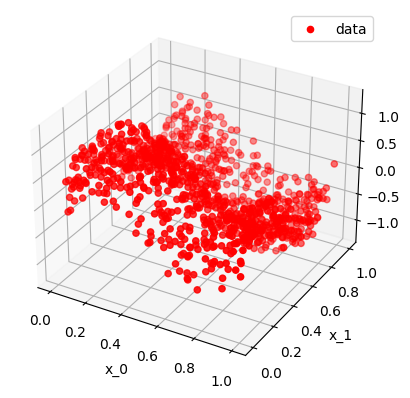

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='data', c='r', marker='o')
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')
ax.legend()
plt.show()

In [6]:
model: Model = MultivariateGaussianModel(
    [
        (0, 1, 5),
        (0, 1, 5),
    ],
    cov=np.array([
        [.01, 0],
        [0, .01],
    ]),
)

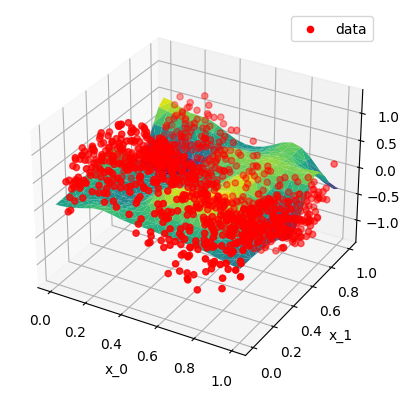

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='data', c='r', marker='o')
model_plot = model.data_to_plot_matplotlib()
ax.plot_trisurf(model_plot[:, 0], model_plot[:, 1], model_plot[:, 2], cmap='viridis', edgecolor='none')
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')
ax.legend()

plt.show()

In [8]:
er = get_model_error(model, data[:, :2], data[:, 2])
print('error: {}'.format(er))

error: 176.4316221713469


In [9]:
error_history = train_model(model,
                            data_x=data[:, :2],
                            data_y=data[:, 2],
                            a=.1,
                            epochs_count=10,
                            error_threshold=15,
                            )

epoch: 0/10 error: 176.4316221713469
epoch: 1/10 error: 18.73465548870839
epoch: 2/10 error: 17.998845489876654
epoch: 3/10 error: 17.91501934474495
epoch: 4/10 error: 17.893997323044985
epoch: 5/10 error: 17.887417882536297
epoch: 6/10 error: 17.885127071933223
epoch: 7/10 error: 17.884246794795857
epoch: 8/10 error: 17.88387132263522
epoch: 9/10 error: 17.883694195871186
epoch: 10/10 error: 17.88360332290452


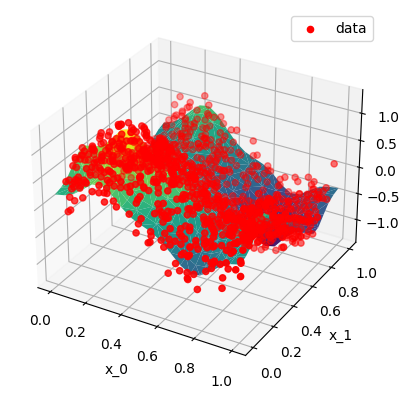

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='data', c='r', marker='o')
model_plot = model.data_to_plot_matplotlib()
ax.plot_trisurf(model_plot[:, 0], model_plot[:, 1], model_plot[:, 2], cmap='viridis', edgecolor='none')
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')
ax.legend()

plt.show()

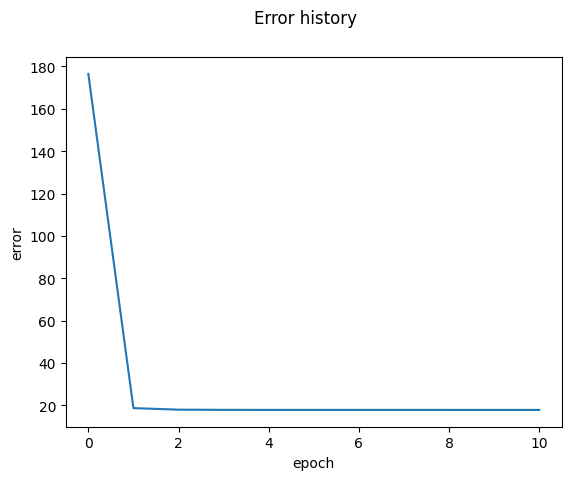

In [11]:
# plot error history
fig = plt.figure()
fig.suptitle('Error history')
ax = fig.add_subplot(111)
ax.plot(error_history)
ax.set_xlabel('epoch')
ax.set_ylabel('error')
plt.show()